In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df.shape

(891, 12)

In this dataset there is 12 columns and 891 records and we have to predict the passenger survived or not so it is an binary classification problem

In [90]:
df.columns  #fetching columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
df.columns.tolist()  #converting columns into list

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [92]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Here there is total 12 columns in which 5 columns is with int datatype, 5 columns with oblect datatype and 2 columns with float datatype

In [93]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

here we have found null values in Age, Cabin and Embarked column

In [94]:
# check the unique values count of each columns

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

Here we can see that in Ticket column there is an same ticket number repeated nultiple times

In [95]:
#lets check the duplicate values in ticket column where ticket numbers found multiple times

df.loc[df['Ticket']=="347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [96]:
#lets check the duplicate values in ticket column where ticket numbers found multiple times

df.loc[df['Ticket']=="CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [97]:
#lets check the duplicate values in ticket column where ticket numbers found multiple times

df.loc[df['Ticket']=="1601"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [98]:
#lets check the duplicate values in ticket column where ticket numbers found multiple times

df.loc[df['Ticket']=="3101295"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S


In [99]:
df.loc[df['Ticket']=="CA 2144"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


We have checked the location off all tickets which was repeated but all the unique so cant delete anything as there is no duplicate vakues present.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There is total 12 columns in which 11 columns are the features and 1 column is an target and out of 12 columns 2 columns have float datatype, 5 columns have int datatype and 5 column have object datatype.

There is null values present in Age, Cabin and Embarked column.

In [101]:
#As cabin column has so many null values so we can delete this column 

df.drop('Cabin', axis=1, inplace=True)

In [102]:
#checking cabin column dropped or not
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [103]:
np.mean(df['Age'])  # calculating mean of age 

29.69911764705882

In [104]:
df['Age']=df["Age"].fillna(df["Age"].mean())  #fillling null values

In [105]:
df.iloc[62,:]

PassengerId                             63
Survived                                 0
Pclass                                   1
Name           Harris, Mr. Henry Birkhardt
Sex                                   male
Age                                   45.0
SibSp                                    1
Parch                                    0
Ticket                               36973
Fare                                83.475
Embarked                                 S
Name: 62, dtype: object

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Now only Embarked columns and null values lets find that row of NaN

In [107]:
np.where(df["Embarked"].isna())[0]  #getting the index of null values of Embarked

array([ 61, 829], dtype=int64)

In [108]:
df.loc[df['PassengerId']==62]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN


In [109]:
df.loc[df['PassengerId']==830]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [110]:
df['Embarked']=df['Embarked'].replace(np.nan,"C")  #replaced nan By "C"
df['Embarked'].value_counts()

S    644
C    170
Q     77
Name: Embarked, dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Here we have treated all the null values

<AxesSubplot:>

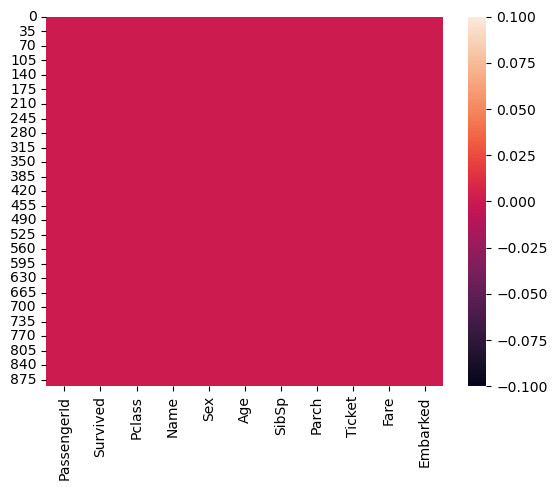

In [112]:
sns.heatmap(df.isnull())

We observed that now there is no null values present by using heatmap

In [113]:
# separating Numerical and categorical columns

#checking for categorical columns

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print('Categorical columns    :',categorical_col)
print("\n")

#checking for Numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print('Numerical columns    :',numerical_col)        


Categorical columns    : ['Name', 'Sex', 'Ticket', 'Embarked']


Numerical columns    : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [114]:
# checking the unique values of each columns using dataframe

df.nunique().to_frame("Number of Unique Values")

,Number of Unique Values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


Here PassengerId is Name is unique. We can drop the Name column and use passengerid as an index value

In [115]:
df.drop(['Name'],axis=1,inplace=True)

In [116]:
#setting PassengerId as DataFrame Index

df.set_index('PassengerId',inplace=True)

In [117]:
df.info() # check Name dropped or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [118]:
df.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.000000,1,0,113803,53.1000,S
5,0,3,male,35.000000,0,0,373450,8.0500,S
6,0,3,male,29.699118,0,0,330877,8.4583,Q
7,0,1,male,54.000000,0,0,17463,51.8625,S
8,0,3,male,2.000000,3,1,349909,21.0750,S
9,1,3,female,27.000000,0,2,347742,11.1333,S


We are dropping Ticket column as its an object datatype and nothing is related to the survived or not

In [119]:
df.drop(['Ticket'],inplace= True, axis=1)

In [120]:
#checking ticket dropped or not

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [121]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
        
df        

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1.0,22.000000,1,0,7.2500,2.0
2,1,1,0.0,38.000000,1,0,71.2833,0.0
3,1,3,0.0,26.000000,0,0,7.9250,2.0
4,1,1,0.0,35.000000,1,0,53.1000,2.0
5,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
887,0,2,1.0,27.000000,0,0,13.0000,2.0
888,1,1,0.0,19.000000,0,0,30.0000,2.0
889,0,3,0.0,29.699118,1,2,23.4500,2.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


We have encoded the object datatype into numerical

In [123]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.531987
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794531
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


Here PClass,Sex,SipSp,Parch is an categorical data so we are keeping as it is. 

In Age and Fare columns there is an huge gap between 75% percentile and max it means that there is an outlier present in both of the columns

In [124]:
df['Survived'].unique()  # checking unique values

array([0, 1], dtype=int64)

In [125]:
df['Survived'].value_counts()  # checking values count of unique numbers

0    549
1    342
Name: Survived, dtype: int64

Here 0 is for not survived and 1 is for survived

3    491
1    216
2    184
Name: Pclass, dtype: int64


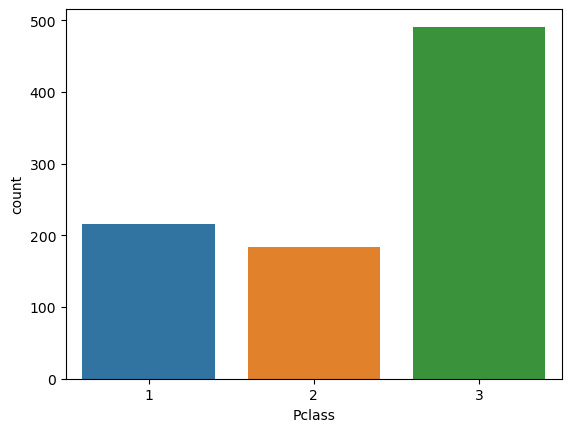

In [126]:
# Univariate Analysis

#visualize the count of PClass

print(df["Pclass"].value_counts())
ax=sns.countplot(x="Pclass",data=df)
plt.show()

1.0    577
0.0    314
Name: Sex, dtype: int64


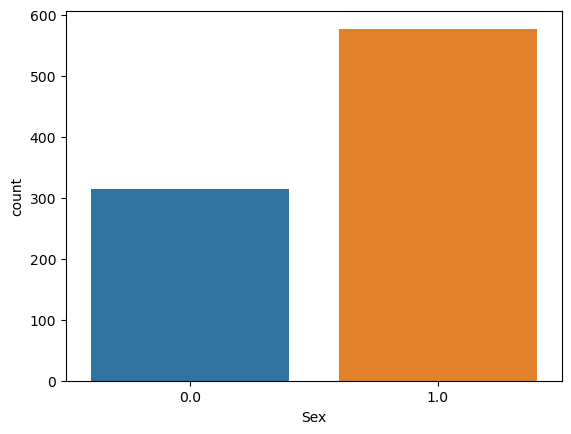

In [127]:
#visualize the count of sex

print(df["Sex"].value_counts())
ax=sns.countplot(x="Sex",data=df)
plt.show()

2.0    644
0.0    170
1.0     77
Name: Embarked, dtype: int64


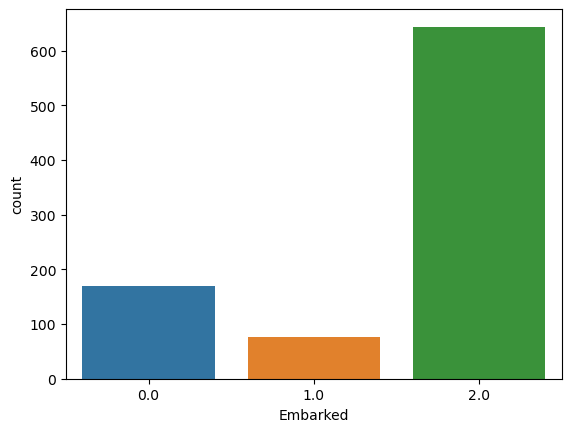

In [128]:
# visualize the count of Embarked

print(df["Embarked"].value_counts())
ax=sns.countplot(x="Embarked",data=df)
plt.show()

By observing Embarked we can observed that many of the passengers embarked from Southampton

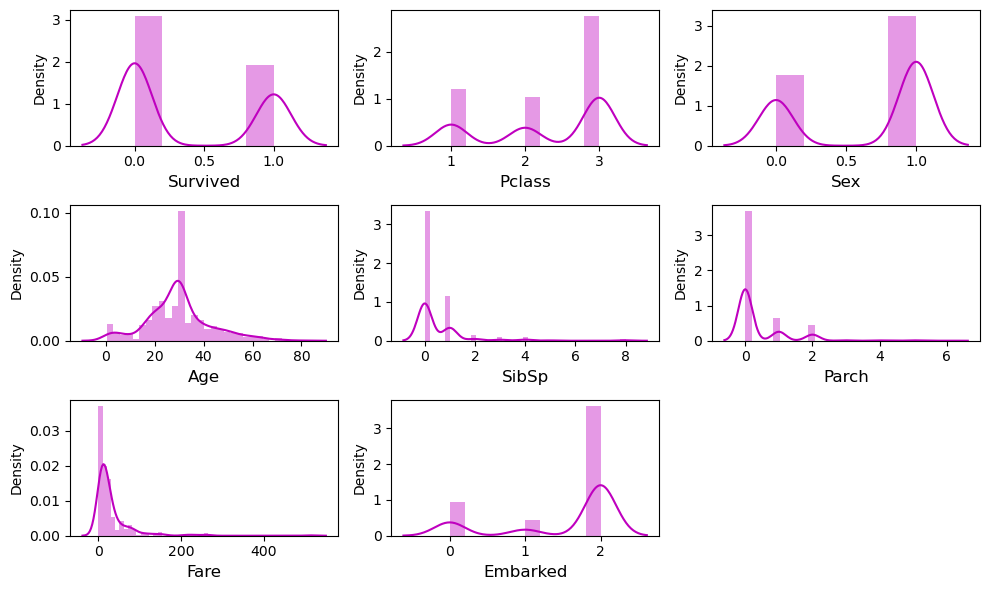

In [129]:
# lets check how data distributed

plt.figure(figsize=(10,6), facecolor='white')
plotnumber = 1
for col in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()    

By observing distribution plot we can say that PClass, Sex, Age, Embarked distributed normally.

But SibSp, Parch, Fare having outliers

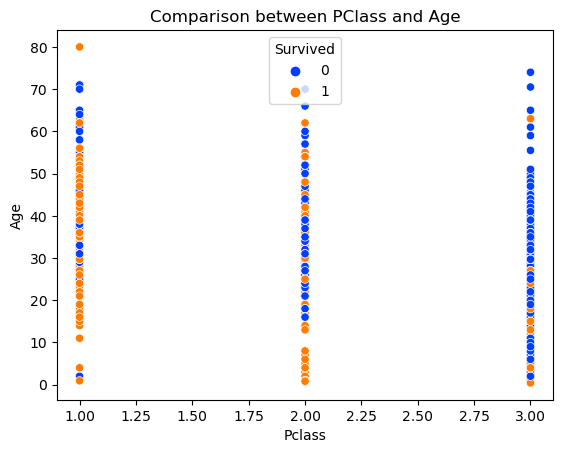

In [130]:
#comparing Pclass and Age

plt.title("Comparison between PClass and Age")
sns.scatterplot(x="Pclass",y="Age",data=df,hue="Survived",palette="bright")
plt.show()

By observing scatterplot comparison of Age and Pclass we can say that Pclass 1 has has high survived numbers

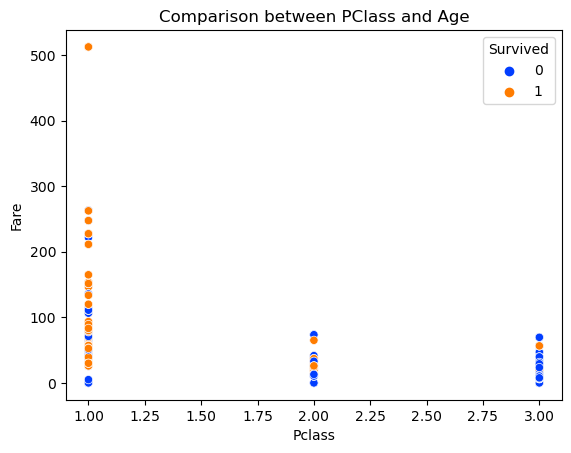

In [131]:
#comparing Pclass and Sex

plt.title("Comparison between PClass and Age")
sns.scatterplot(x="Pclass",y="Fare",data=df,hue="Survived",palette="bright")
plt.show()

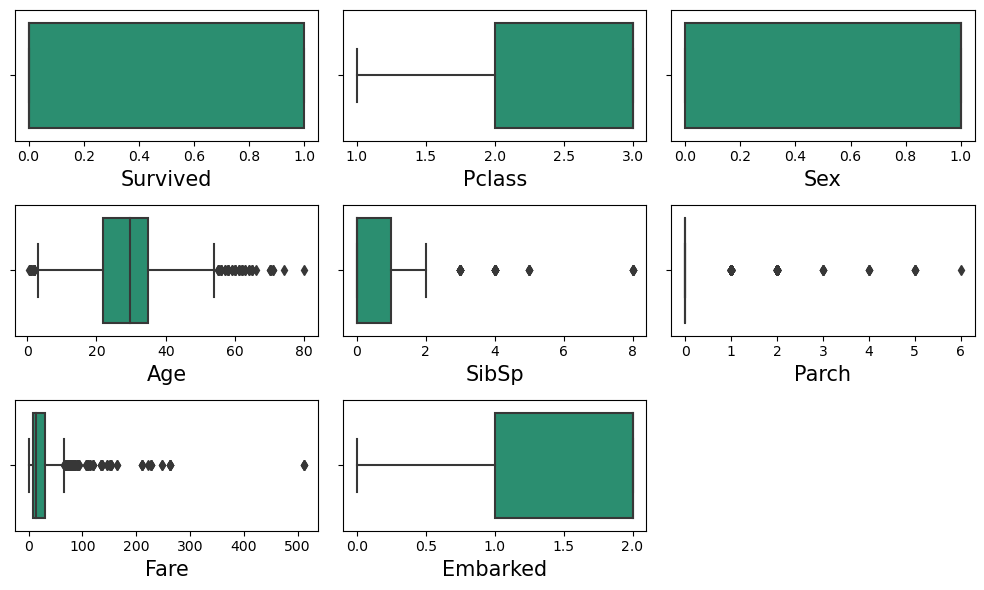

In [132]:
# lets check the outliers by using box plot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette="Dark2")
        plt.xlabel(col, fontsize=15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()   

Here we are finding outliers in Age, Fare, SipSp and Parch column

As we are working on classification problem there is many categorical data is present as well as all records have unique ID so we are not treating the outiers in this case as will loss the important data.

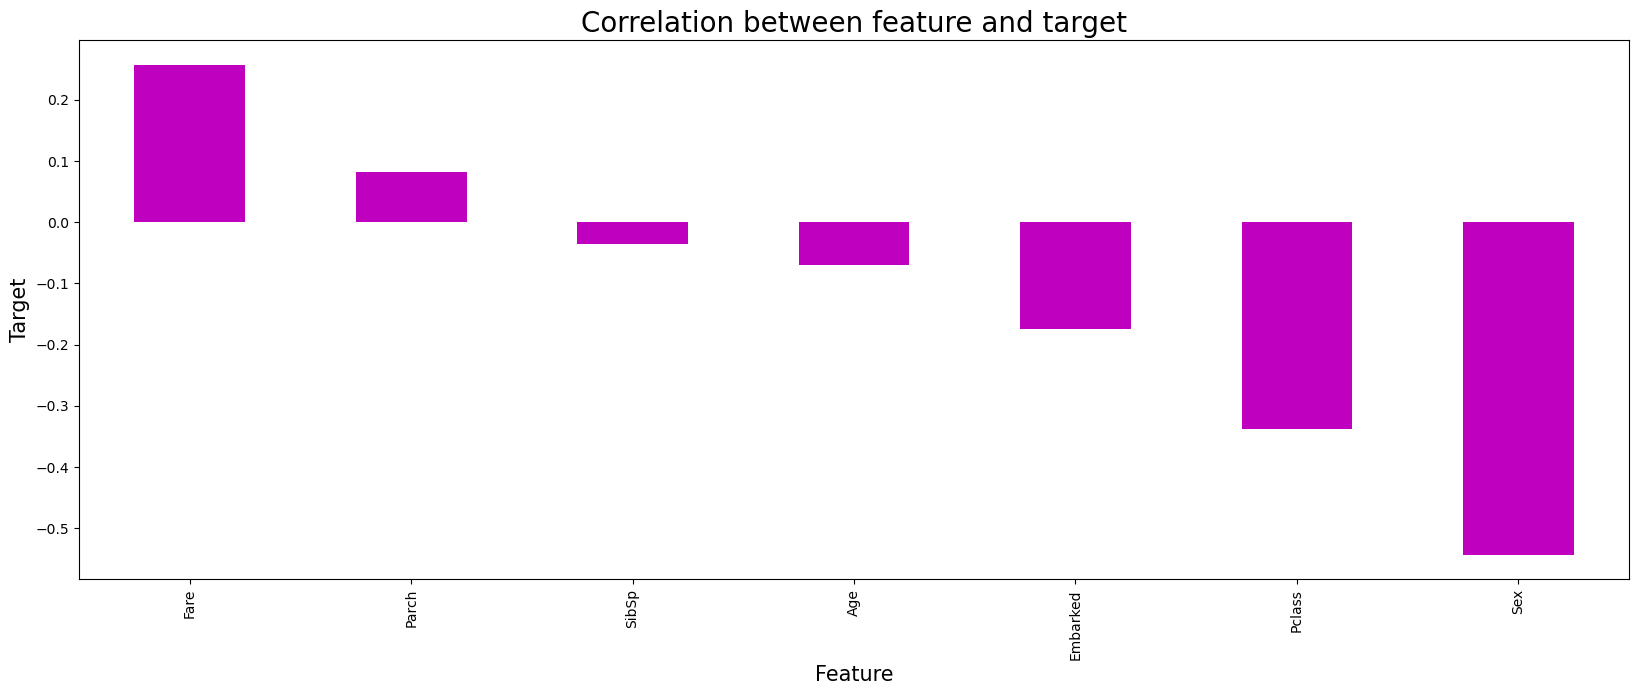

In [133]:
# visualizing the corelation between features and labels using bar plot

plt.figure(figsize=(20,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='m')
plt.xlabel('Feature', fontsize=15)
plt.ylabel('Target', fontsize=15)
plt.title('Correlation between feature and target', fontsize=20)
plt.show()

Here we observed that Fare has positive relation with the target and Embarked,Pclass and Sex has negative correlation with the target

In [134]:
df.corr()  #checking correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.174199
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.170334
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.115513
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.035479
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.070653
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.042325
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.229304
Embarked,-0.174199,0.170334,0.115513,-0.035479,0.070653,0.042325,-0.229304,1.000000


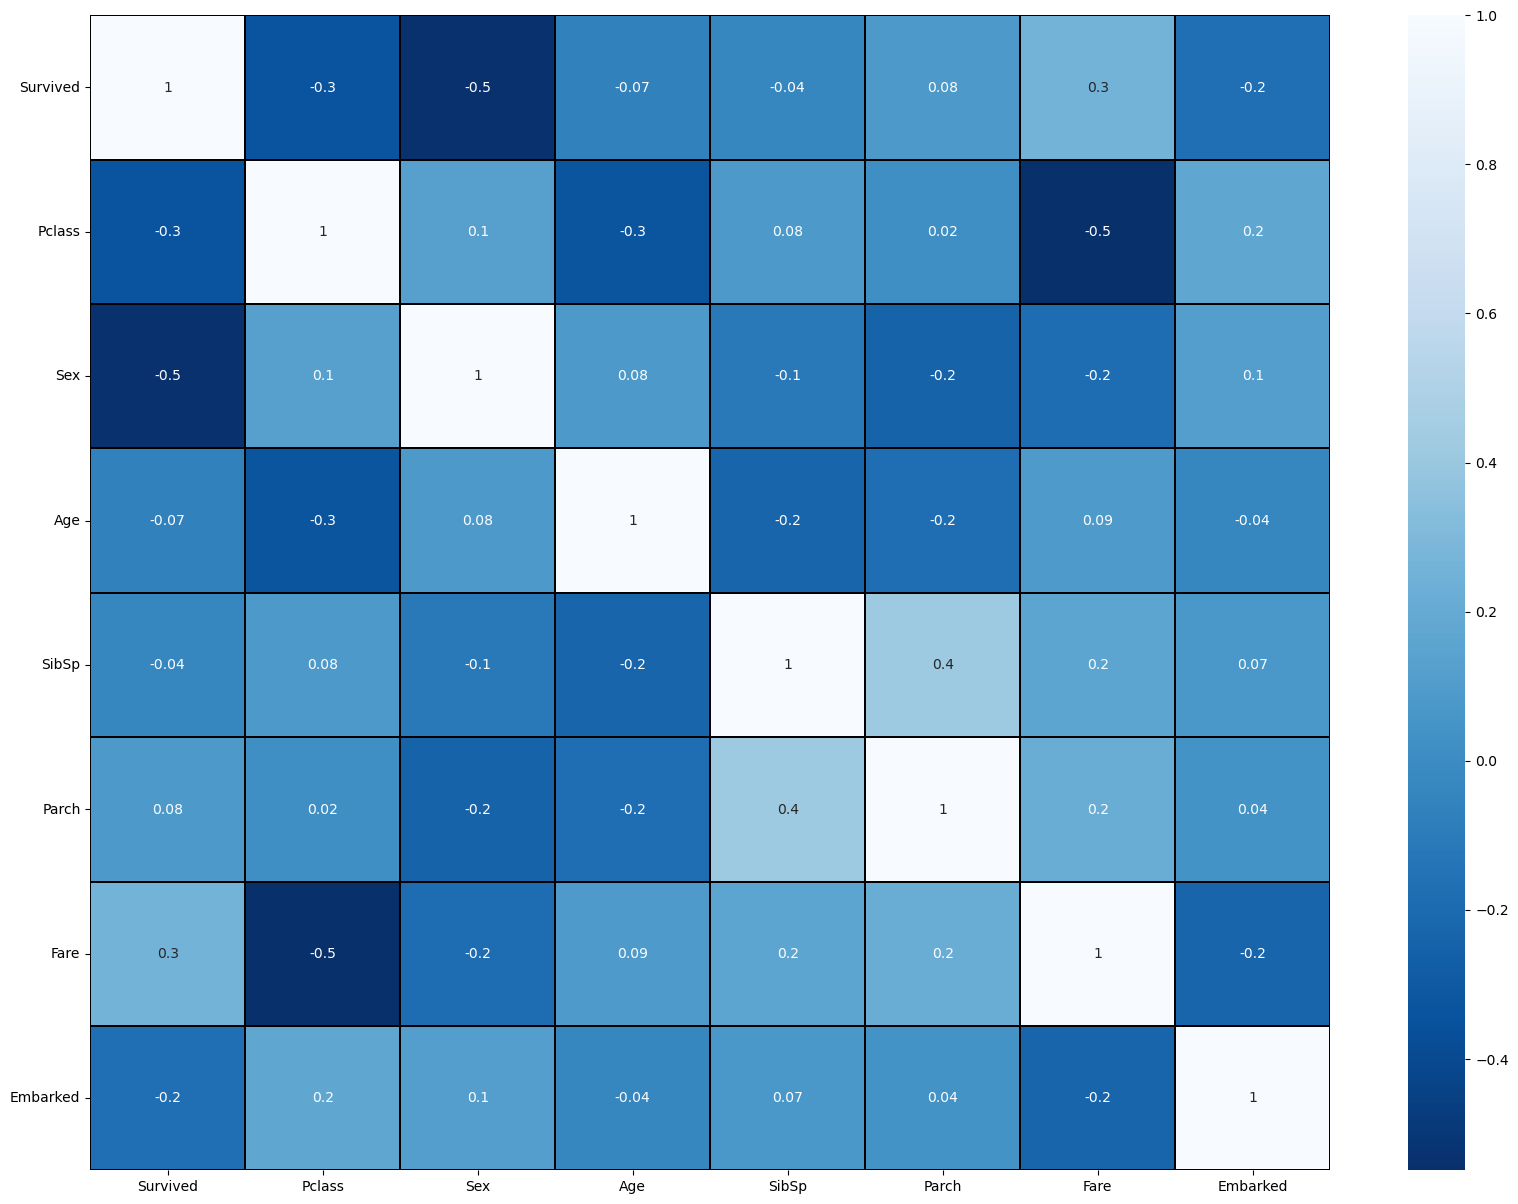

In [135]:
# visualize the correlation matrix using heat map

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1, fmt=".1g", linecolor="black", annot=True, cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

Same relations we have observed as we find in barplot

In [136]:
#checking the relation between features and labels and it ranges between -1 to 1 where -1 is strongly correlated wih target
#1 is strongly positive relation with target

cor=df.corr()

In [137]:
cor["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.174199
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [138]:
df.skew() #checking skewness

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.250164
dtype: float64

Here there is skewness present present in SipSp, Parch, Fare, Embarked.

SipSp, Parch , Embarked is an categorcal data no need to remove the skewness

In [139]:
# removing skewness

df["Fare"]=np.cbrt(df["Fare"])

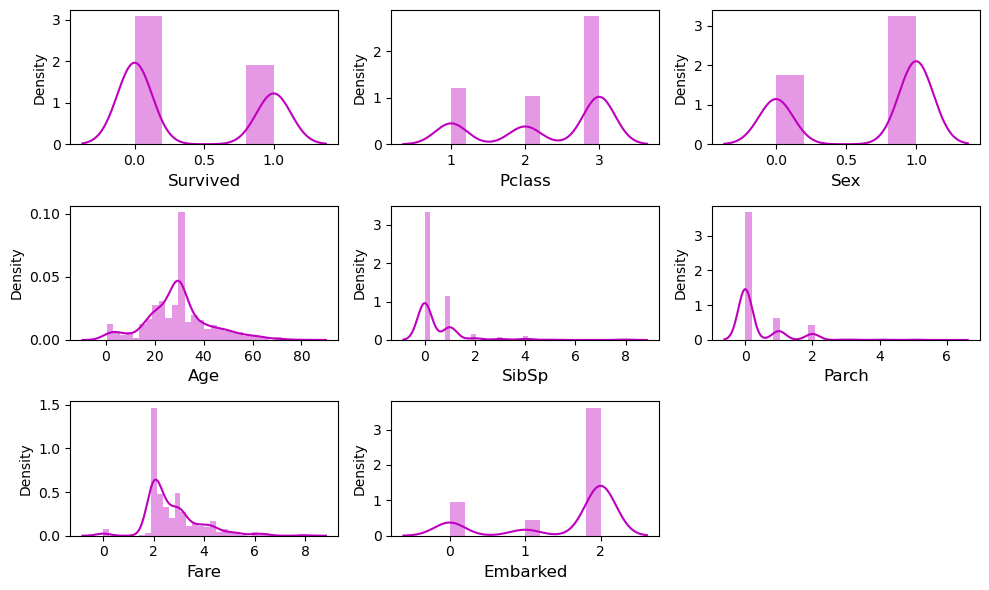

In [140]:
# lets check how data distributed

plt.figure(figsize=(10,6), facecolor='white')
plotnumber = 1
for col in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1 
plt.tight_layout()    

In [141]:
# Separating feature and target

x=df.drop("Survived",axis=1)
y=df["Survived"]

In [142]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1.0,22.000000,1,0,1.935438,2.0
2,1,0.0,38.000000,1,0,4.146318,0.0
3,3,0.0,26.000000,0,0,1.993730,2.0
4,1,0.0,35.000000,1,0,3.758647,2.0
5,3,1.0,35.000000,0,0,2.004158,2.0
...,...,...,...,...,...,...,...
887,2,1.0,27.000000,0,0,2.351335,2.0
888,1,0.0,19.000000,0,0,3.107233,2.0
889,3,0.0,29.699118,1,2,2.862294,2.0


In [143]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [144]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.774708,0.589375
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,1.287903,-1.929248
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.720325,0.589375
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.926230,0.589375
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.710596,0.589375
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386703,0.589375
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,0.318502,0.589375
888,0.827377,-1.355574,0.000000,0.432793,2.008933,0.089990,0.589375
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,0.318502,-1.929248


In [145]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF Values,Features
0,2.278031,Pclass
1,1.121020,Sex
2,1.204375,Age
3,1.414081,SibSp
4,1.383292,Parch
5,2.558500,Fare
6,1.094084,Embarked


Here by using VIF we observed that is no multicolinearity issue

In [146]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here data is not imbalanced

In [147]:
#finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxACCU=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACCU:
        maxACCU=acc
        maxRS=1
print("best accuracy is:", maxACCU,  "at random state:",maxRS)  

best accuracy is: 0.8507462686567164 at random state: 1


In [148]:
# creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [149]:
# Classification Algorithms


from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [150]:
#checking accuracy score for randomforestclassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.7723880597014925
[[135  18]
 [ 43  72]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       153
           1       0.80      0.63      0.70       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268



In [151]:
#checking accuracy score for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7761194029850746
[[129  24]
 [ 36  79]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.77      0.69      0.72       115

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.77       268



In [152]:
#checking accuracy score for support vector machine

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7649253731343284
[[140  13]
 [ 50  65]]
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       153
           1       0.83      0.57      0.67       115

    accuracy                           0.76       268
   macro avg       0.79      0.74      0.74       268
weighted avg       0.78      0.76      0.76       268



In [153]:
#checking accuracy score for GradientBoostingClassifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.7686567164179104
[[138  15]
 [ 47  68]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       153
           1       0.82      0.59      0.69       115

    accuracy                           0.77       268
   macro avg       0.78      0.75      0.75       268
weighted avg       0.78      0.77      0.76       268



In [154]:
#checking accuracy score for AdaBoostClassifier

AB=AdaBoostClassifier()
AB.fit(x_train,y_train)
predAB=AB.predict(x_test)
print(accuracy_score(y_test,predAB))
print(confusion_matrix(y_test,predAB))
print(classification_report(y_test,predAB))

0.7574626865671642
[[131  22]
 [ 43  72]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       153
           1       0.77      0.63      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268



In [155]:
#checking accuracy score for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7649253731343284
[[131  22]
 [ 41  74]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.77      0.64      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268



In [156]:
#checking accuracy score for BaggingTreesClassifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.7873134328358209
[[137  16]
 [ 41  74]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       153
           1       0.82      0.64      0.72       115

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [157]:
from sklearn.model_selection import cross_val_score

# checking cv score for RandomForestClassifier

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between accuracy score and cross val score is -", accuracy_score(y_test,predRFC) - score.mean())

[0.78212291 0.79213483 0.84269663 0.7752809  0.84269663]
0.8069863787583955
Difference between accuracy score and cross val score is - -0.034598319056903026


In [158]:
# checking cv score for Logistic Regression

score1 = cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross val score is -", accuracy_score(y_test,predLR) - score1.mean())

[0.78212291 0.78089888 0.7752809  0.76966292 0.82022472]
0.785638064151654
Difference between accuracy score and cross val score is - -0.0095186611665794


In [159]:
# checking cv score for SVC

score2 = cross_val_score(svc,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross val score is -", accuracy_score(y_test,predsvc) - score2.mean())

[0.83240223 0.82022472 0.81460674 0.79775281 0.85955056]
0.8249074132195091
Difference between accuracy score and cross val score is - -0.05998204008518071


In [160]:
# checking cv score for GradientBoostingClassifier

score3 = cross_val_score(GB,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross val score is -", accuracy_score(y_test,predGB) - score3.mean())

[0.81005587 0.8258427  0.84269663 0.80337079 0.84269663]
0.8249325214989642
Difference between accuracy score and cross val score is - -0.05627580508105379


In [161]:
# checking cv score for AdaBoost classifier

score4 = cross_val_score(AB,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross val score is -", accuracy_score(y_test,predAB) - score4.mean())

[0.75977654 0.79775281 0.80898876 0.80898876 0.8258427 ]
0.8002699140041429
Difference between accuracy score and cross val score is - -0.042807227436978734


In [162]:
# checking cv score for Extratreesclassifier

score5 = cross_val_score(ET,x,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross val score is -", accuracy_score(y_test,predET) - score5.mean())

[0.75977654 0.76966292 0.8258427  0.7752809  0.8258427 ]
0.7912811499591991
Difference between accuracy score and cross val score is - -0.02635577682487067


In [163]:
# checking cv score for Baggingclassifier

score6 = cross_val_score(BC,x,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross val score is -", accuracy_score(y_test,predBC) - score6.mean())

[0.77653631 0.80337079 0.8258427  0.79775281 0.80337079]
0.8013746783001695
Difference between accuracy score and cross val score is - -0.014061245464348615


Logistic Regression is our best fit model as differnece between CV and Logistic Model Accuracy score is least.

In [164]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

parameters = {"C":np.logspace(-3,3,7),
             "penalty":["l1","l2"]}  # l1 lasso l2 ridge

In [165]:
LR=LogisticRegression
GCV=GridSearchCV(LR(),parameters,cv=5)

In [166]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [167]:
GCV.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [168]:
final_model=LR(C=1,penalty='l2')
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.61194029850746


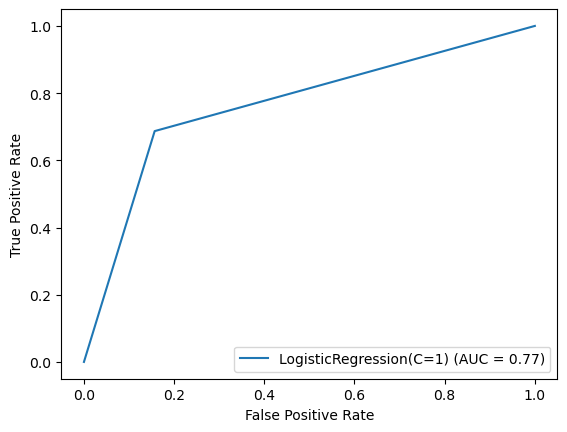

In [169]:
#Plotting ROCAUC curve

from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

Saving The Model

In [170]:
# saving model using .pkl

import joblib
joblib.dump(final_model,'Titanic Survived Project.pkl')

['Titanic Survived Project.pkl']

In [171]:
#lets load the saved model and get the predictions

model=joblib.load('Titanic Survived Project.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0], dtype=int64)

In [172]:
a=np.array(y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,1,0
4,1,1
...,...,...
263,1,1
264,0,0
265,0,0
266,1,1
